In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Q.13**

In [3]:
df_13 = pd.read_parquet('../data/raw/parquets/Q_13_data.parquet')
df_13.head()

,player_id,plays
0,192013,right-handed
1,273680,right-handed
2,77223,right-handed
3,88992,right-handed
4,248846,right-handed


In [4]:
print(set(df_13['plays']))

{'left-handed', None, 'right-handed'}


In [5]:
print(len(df_13) - (133+1013))

1498


In [6]:
right_handed_count = list(df_13['plays']).count('right-handed')
left_handed_count = list(df_13['plays']).count('left-handed')

print(right_handed_count, left_handed_count)

1013 133


In [7]:
left_handed_percentage = (left_handed_count/(right_handed_count+left_handed_count))*100
print(left_handed_percentage)

11.605584642233858


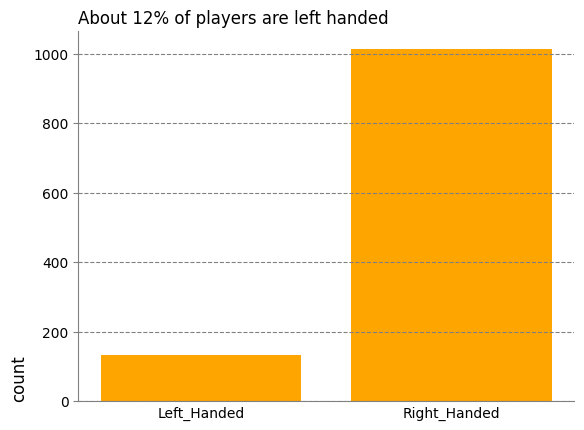

In [8]:
fig, ax = plt.subplots()
ax.bar(['Left_Handed', 'Right_Handed'], [left_handed_count, right_handed_count], color = 'orange')
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color('gray')
ax.set_ylabel('count', loc = 'bottom', size = 'large')
ax.set_title('About 12% of players are left handed', size = 'large', loc = 'left')
ax.set_yticks(np.arange(0, 1100, 200))
ax.grid(axis = 'y', color = 'gray', linestyle = '--')
ax.tick_params(axis = 'x', length = 0)
ax.tick_params(color = 'gray')

### **Q.14**

In [9]:
df_tournament = pd.read_parquet('../data/raw/parquets/match_tournament.parquet', engine = 'pyarrow')
df_tournament.head()

,match_id,tournament_id,tournament_name,tournament_slug,tournament_unique_id,tournament_category_name,tournament_category_slug,user_count,ground_type,tennis_points,has_event_player_statistics,crowd_sourcing_enabled,has_performance_graph_feature,display_inverse_home_away_teams,priority,competition_type
0,11974049,70826,Qualifiers,qualifiers,None,Davis Cup,davis-cup,6905,None,NaN,False,False,False,False,0,2.0
1,11974052,70826,Qualifiers,qualifiers,None,Davis Cup,davis-cup,6909,None,NaN,False,False,False,False,0,2.0
2,11974053,70826,Qualifiers,qualifiers,None,Davis Cup,davis-cup,6907,None,NaN,False,False,False,False,0,2.0
3,11974065,70826,Qualifiers,qualifiers,None,Davis Cup,davis-cup,6903,None,NaN,False,False,False,False,0,2.0
4,11974066,70826,Qualifiers,qualifiers,None,Davis Cup,davis-cup,6909,None,NaN,False,False,False,False,0,2.0


In [15]:
Q_14_data = np.array(df_tournament['ground_type'])
Q_14_data

array([None, None, None, ..., 'Red clay', 'Red clay', 'Red clay'],
      shape=(16873,), dtype=object)

In [16]:
print(set(Q_14_data))

{None, 'Grass', 'Red clay', 'Red clay indoor', 'Green clay', 'Carpet indoor', 'Hardcourt indoor', 'Synthetic outdoor', 'Hardcourt outdoor'}


In [18]:
print(len(Q_14_data), list(Q_14_data).count(None))

16873 248


In [19]:
Q_14_data_filtered = Q_14_data[Q_14_data != None]

Text(0.0, 1.0, 'Hardcourt outdoor is the most common type of ground')

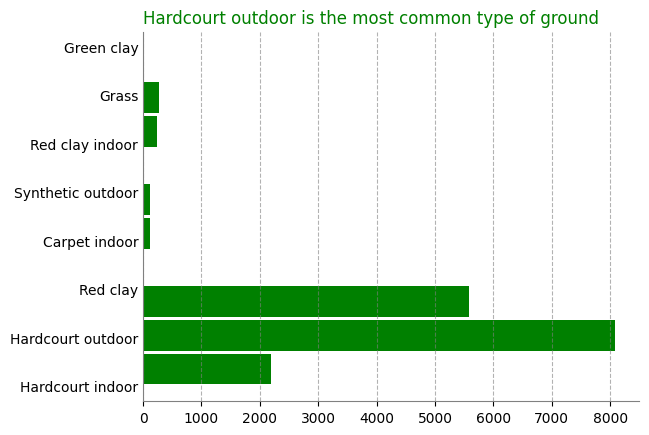

In [54]:
fig, ax = plt.subplots()
ax.hist(Q_14_data_filtered, orientation = 'horizontal', rwidth = 0.9, color = 'green')
ax.tick_params(axis = 'y', length = 0)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('gray')
ax.grid(axis = 'x', color = 'gray', linestyle = '--', alpha = 0.6)
ax.set_title('Hardcourt outdoor is the most common type of ground', color = 'green', loc = 'left')